# Methodology

## Algorithm: DDGP

To solve this task, we used Deep Deterministic Policy Gradient (DDPG). This algorithm is known as Actor-Critic. It uses two neural nets, one to get the best action, then the second takes that action to output the value of that action. This algorithm is used with continuous space actions as it's hard to apply DQN for those. 

## Model

For the model I used the Actor-Critic method to solve this task. 

**Model Architecture**

*Actor*
1. Batch Normalization layer | shape(in = 33, out = 33)
2. Linear layer | shape(in = 33, out = 200)
3. Batch Normalization layer | shape(in = 200, out = 200)
4. ReLU activation layer
5. Linear layer | shape(in = 200, out = 150)
6. Batch Normalization layer | shape(in = 150, out = 150)
7. ReLU activation layer
8. Linear layer | shape(in = 150, out = 4)
9. Tanh Activation

*Critic*
1. Batch Normalization layer | shape(in = 33, out = 33)
2. Linear layer | shape(in = 33, out = 200)
3. ReLU activation layer
4. Concat action to fcs1 | (in = 200, out = 204)
5. Linear layer | shape(in = 204, out = 150)
6. ReLU activation layer
7. Linear layer | shape(in = 150, out = 4)


After many experiments and getting very unstable results, batch normalization was the solution left and it saved the day. The improvement in performance over time was much more stable and yielded better results.

**Hyper Parameters**
```
BUFFER_SIZE = int(1e6)  # replay buffer size
BATCH_SIZE = 256        # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 1e-3         # learning rate of the actor
LR_CRITIC = 1e-3        # learning rate of the critic
WEIGHT_DECAY = 0        # L2 weight decay
```
The task is hard as we are trying to train 20 agents and the average of their performance should be over 30 over 100 episodes. Alot of tuning had to be done. The batches of experiences that are fed to the model affected the performance drastically. Their might be a set of experiences that need to be seen together for the model to learn better.  

Another parameter that was reset later was the number of time steps to train in for each episode. The model couldn't pass a 26 average reward until we eliminated the limit on those steps. Making the agent keep going till we get a **done** signal significantly improved the performance.

# Results

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
output_path = Path('.')
statuses = pd.read_csv((output_path / 'statuses.csv'), names=['episode', 'average-100', 'score'])
statuses.head()

,episode,average-100,score
0,1,0.81,0.81
1,2,0.71,0.62
2,3,0.77,0.88
3,4,0.74,0.67
4,5,0.77,0.86


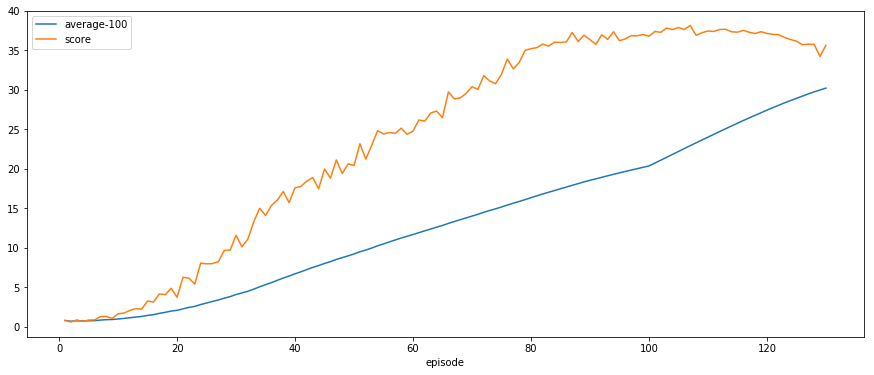

In [4]:
statuses.plot(x='episode', figsize=(15,6))
plt.savefig('rolling_mean_vs_score.png')
plt.show()

Environment was solved in **130** episodes!

# Analysis

This model was one of the hardest to train. Even training one agent didn't seem easy. Many steps were taken to reach the best solution. Hyper parameter tuning had a unique impact as it usually affected the stability of the agent. Small changes here couldn't solve the problem as we are trying to solve it over 100 episodes so one successful spike wouldn't help. Tricks like using gradient clippling and training till the environment is **"done"** in each episode had much more effect on boosting the score.

# Future Plans

1. Train different numbers of agents to measure the effect on performance.
2. Test training 10 times every 20 episodes, like the benchmark implementation suggests.
3. Test using hard updates instead of soft updates